# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.



## Diccionario de datos

Hay cinco tablas en el conjunto de datos
  

# Paso 1. Descripción de los datos




## Plan de solución



Comentario: Se muestra la informacion suministrada verificando las columnas de cada uno de los datase, revisando su contenido, para luego saber que bibliotecas de Phyton se debian llamar.

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt




In [ ]:
data_instacart = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
data_products = pd.read_csv('/datasets/products.csv',sep=';')
data_aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
data_department= pd.read_csv('/datasets/departments.csv',sep=';')
data_order_products= pd.read_csv('/datasets/order_products.csv',sep=';')

In [ ]:
print(data_instacart.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [ ]:
print(data_products.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [ ]:
print(data_aisles.info(show_counts=True))
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [ ]:
print(data_department.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [ ]:
print(data_order_products.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Conclusiones intermedias 

Comentario: Como principal objetivo para garantizar que la data con la que se trabaja sea realmente adecuada y no tenga algun sesgo,se procede a verificar la informacion de los datset como valores ausentes, tipo de datos y duplicados como primera medida pues estos errores no permiten el analisis de los datos.

# Paso 2. Preprocesamiento de los datos



Comentario: Lo primero que haremos es revisar el tipo de los datos con los que se cuenta verificando que sea el correcto o adecuado para la informacion que se maneja, ademas se revisaran los dataset para validar si tienen valores ausentes para proceder completandolos y por ultimo se revisaran y eliminar los datos se encuentran duplicados en cada uno de los dataset procesados con las bibliotecas de Phyton garantizando que la informacion se encuentre depurada para un analisis efectivo.

## Encuentrar y eliminar los valores duplicados 

### `orders` data frame

In [ ]:

print(data_instacart[data_instacart.duplicated()])




        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [ ]:

new_result=data_instacart.query("order_dow ==3 and order_hour_of_day== 2")
print(new_result.groupby(['order_id'])['order_id'].value_counts().head(30))# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


order_id  order_id
191       191         1
222962    222962      1
238782    238782      1
248760    248760      1
264348    264348      1
272079    272079      1
284770    284770      1
332561    332561      1
350018    350018      1
353088    353088      1
382357    382357      1
391768    391768      2
401662    401662      1
404972    404972      1
408114    408114      2
449909    449909      1
467134    467134      2
494201    494201      1
508008    508008      1
522496    522496      1
553049    553049      1
577527    577527      1
592699    592699      1
593561    593561      1
596062    596062      1
632042    632042      1
690242    690242      1
736983    736983      1
738145    738145      1
774488    774488      1
Name: order_id, dtype: int64


In [ ]:
data_instacart=(data_instacart.drop_duplicates(subset='order_id').reset_index(drop=True)) 

In [ ]:
print(data_instacart.duplicated().sum())

0


In [ ]:

print(data_instacart[data_instacart['order_id'].duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Comentario: Con la ayuda de la funcion duplicated se identificaron que habian ordenes duplicadas en una franja horaria y dia en especifico, por lo cual se procedio a eliminar los duplicados, a traves de reset_index renombrando los indices.

### `products` data frame

In [ ]:
print(data_products.duplicated().sum())

0


In [ ]:
print(data_products['department_id'].duplicated().sum())

49673


In [ ]:
data_products['product_name']=(data_products['product_name'].str.upper())
print(data_products['product_name'].duplicated().sum())

1361


In [ ]:
print(data_order_products.duplicated().sum())

0


### `departments` data frame

In [ ]:

print(data_department.duplicated().sum())


0


In [ ]:
print(data_department['department_id'].duplicated().sum())

0


Comentario: Con ayuda de la funcion duplicated se identifico que no se encontraron filas duplicadas ni IDs de productos para este dataset.

### `aisles` data frame

In [ ]:
print(data_aisles.duplicated().sum())

0


In [ ]:
print(data_aisles['aisle_id'].duplicated().sum())

0


Comentario: Especificamente para seguir corrobando que la informacion con la que se hara el analisis es la correcta, para los pasillos tambien se realiza la verificacion de los datos duplicados.

### `order_products` data frame

In [ ]:
print(data_order_products.duplicated().sum())


0


In [ ]:
print(data_order_products.duplicated().sum())

0


Comentario: No se encontraron duplicados de ningun tipo o que intervengan en el analisis de datos o modifiquen los resultados.

## Encuentrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:


### `products` data frame

In [ ]:
print(data_products[data_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. hay valores ausente en la columna 'product_name'

In [ ]:
pasillo_incompleto=(data_products[data_products['product_name'].isna()])
print(pasillo_incompleto['aisle_id'].value_counts())

100    1258
Name: aisle_id, dtype: int64


In [ ]:
department_incomplet=(data_products[data_products['product_name'].isna()])
print(department_incomplet['department_id'].value_counts()) 

21    1258
Name: department_id, dtype: int64


Comentario: Los dataset fueron filtradospor los elementos ausentes y se pudo verificar que todos los datos ausentes corresponden al pasillo 100 y al departamento 21.

In [ ]:
print(data_department[data_department['department_id']==21])
print(data_aisles[data_aisles['aisle_id']==100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos. lo que se encontro es que los productos eb este pasillo y departamento estan relacionados a productos perdidos o faltantes.

In [ ]:
data_products['product_name']= data_products['product_name'].fillna('Unknown')
print(data_products[data_products['product_name'].isna()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


### `orders` data frame

In [ ]:
print(data_instacart[data_instacart['days_since_prior_order'].isna()].sample(12))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
43969    1642849    59421             1          5                 15   
306384   3078455   139649             1          3                 19   
257290   1661328    78123             1          2                  9   
152531   1910833   188510             1          3                 17   
469703    658783     8073             1          1                 16   
172838    606375    54218             1          1                 16   
136615   2206232   101474             1          6                 14   
428514    550487   177845             1          6                 14   
417651   1782641    77325             1          4                 12   
67969    1501928   180225             1          6                 12   
455627   2902046   132847             1          6                 15   
446678   1532047   110173             1          0                 12   

        days_since_prior_order  
43969            

In [ ]:
pedido_ordenado=data_instacart[data_instacart['days_since_prior_order'].isna()]
print(pedido_ordenado['order_number'].value_counts())

1    28819
Name: order_number, dtype: int64


Se verifico que la columna days_since_prior_order  se encontraba con datos nulos a partir de la funcion isna y tambien se encontro que todos esos datos nulos pertenecian a la orden #1.

### `order_products` data frame

In [ ]:
print(data_order_products[data_order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [ ]:
print(data_order_products['add_to_cart_order'].min(),data_order_products['add_to_cart_order'].max())
    


1.0 64.0


Comentario: Al filtrar la tabla por la columna add_to_cart_order que corresponde al orden en el que se agrego al producto al carrito, se evidencio que se tenian valores ausentes, ademas el valor maximo es de 64 y el valor minimo de 1.

In [ ]:
print(data_order_products[data_order_products['add_to_cart_order'].isna()])



         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [ ]:
filtrado_ausentes=(data_order_products[data_order_products['add_to_cart_order'].isna()])
filtrado_pedido=(filtrado_ausentes.groupby('order_id'))                
print(filtrado_pedido['product_id'].count().min())




1


Describe brevemente cuáles son tus hallazgos.

Comentario: Despues del analisis de los datos se evidencia que no todos los pedidos con valores ausentes tienen mas de 64productos, y al consolidar los valores ausentes por su IDde pedido se evidencia que el valor minimo del conteo es 1.

In [ ]:
data_order_products['add_to_cart_order']= data_order_products['add_to_cart_order'].fillna(999)
print(data_order_products['add_to_cart_order'].astype('int'))

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


Comentario: Se procedio a reemplazar la columna add_to_cart_order que contenia datos ausentes por 999, y se convirtieron los datos de esta columna a un numero entero.

## Conclusiones

Conclusiones intermedias : hemos realizado la limpieza de datos para proceder analizar los datos 


Conclusiones:
    Con el fin de realizar un analisis adecuado y correcto que arrojara resultados veridicos se procedio a organizar los datos, eliminar duplicados, convertir datos a numeros enteros garantizando que cuando se analice esta data la informacion este depurada y realmente muestre la tendencia que se esta siguiendo en la operacion.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos



1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

###  Verifica que los valores sean sensibles

In [ ]:
print(data_instacart['order_dow'].min(),data_instacart['order_dow'].max())


0 6


In [ ]:
print(data_instacart['order_hour_of_day'].min(),data_instacart['order_hour_of_day'].max())

0 23


Comentario: A traves de las Funciones minimo y maximo se valido que los datos tuvieran las caracteristicas correctas sin exceder los dias y horas

###  Para cada hora del día, ¿cuántas personas hacen órdenes?

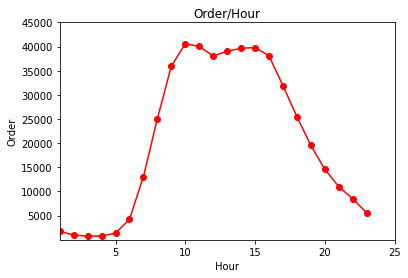

In [ ]:
order_person=data_instacart.groupby('order_hour_of_day')['user_id'].count()
order_person.plot(x='order_hour_of_day', y='user_id',style='o-',title='Order/Hour',color='red',xlabel="Hour",ylabel="Order",xlim=[1, 25],ylim=[1,45000]) # escribe tu código aquí
plt.show()

Escribe aquí tus conclusiones Podemos ver que entra las 8 y la 10 las personas hacen la mayor cantidad de ordenes.

### ¿Qué día de la semana compran víveres las personas?

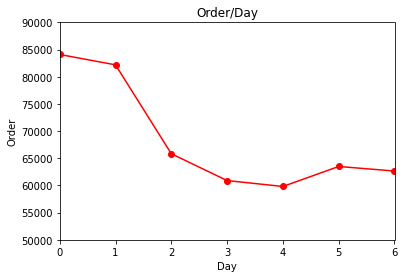

In [ ]:
order_day=data_instacart.groupby('order_dow')['user_id'].count()
order_day.plot(x='order_dow', y='user_id',style='o-',title='Order/Day',color='red',xlabel="Day",ylabel="Order",xlim=[0, 6],ylim=[50000,90000])
plt.show()

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

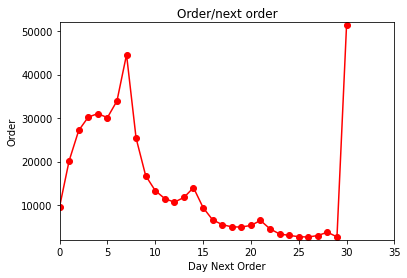

In [ ]:
order_wait=data_instacart.groupby('days_since_prior_order')['user_id'].count()
order_wait.plot(x='days_since_prior_order', y='user_id',style='o-',title='Order/next order',color='red',xlabel="Day Next Order",ylabel="Order",xlim=[0, 35],ylim=[2000,52000])
plt.show()


Conclusiones: en el mayor de los casos la gente espera 30 dias para hacer su proximo pedido

# [B] Intermedio 



###  Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

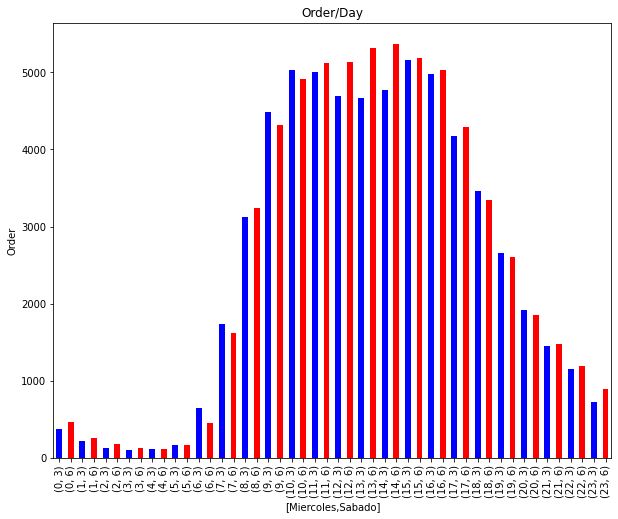

In [ ]:

order_descripcion=data_instacart.query('order_dow==3 or order_dow==6')

new_order_descripcion =order_descripcion.groupby(['order_hour_of_day','order_dow'])['order_hour_of_day'].count()
new_order_descripcion.plot(kind='bar',figsize=[10,8],xlabel=['Miercoles,Sabado'],title='Order/Day',color=['blue','red'],ylabel="Order")


plt.show()


El dia sabado se realizan mas ordenes que el dia Miercoles

La tendencia para los dias miercoles y sabado teniendo en cuenta la hora del dia tiene un comportamiento similar, sin embargo los dias sabados se presentan compras mas altas, y el pico de hora mas alto para los miercoles son las 15 y para los sabados las 14.

###  ¿Cuál es la distribución para el número de pedidos por cliente?

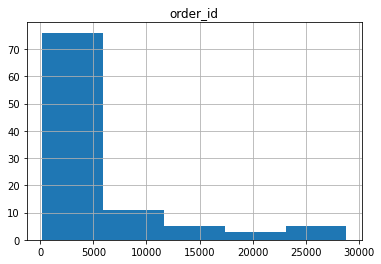

In [ ]:

distribution_data=data_instacart.groupby('order_number')
order_distr={'order_id':'count'}
new_distribution_data=distribution_data.agg(order_distr)
new_distribution_data.hist(bins=5)

plt.show()


la mayor concentracion se encuenta en los clientes que solicitaron 5000 ordenes

### ¿Cuáles son los 20 productos más populares ?

In [ ]:
new_data_merge=data_products.merge(data_order_products,
                               on='product_id')
new_data_merge['product_name']=new_data_merge['product_name'].str.upper()
products_popular=new_data_merge.groupby(['product_id','product_name'])['order_id'].count()


print(products_popular.sort_values(ascending=False).head(20))


product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

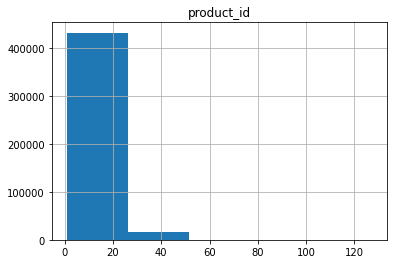

In [ ]:
buy_data_merge=data_instacart.merge(data_order_products,
                              on='order_id')
buy_order_data=buy_data_merge.groupby('order_id')
new_buy_order_distr={'product_id':'count'}
new_buy_data=buy_order_data.agg(new_buy_order_distr)
new_buy_data.hist(bins=5)
plt.show()



Comentario: Regularmente las personas compran 25 articulos por orden, esto analizando las 420.000 ordenes aproximadamente.

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia 

In [ ]:
articles_new_data_merge=data_products.merge(data_order_products,
                               on='product_id')

articles_new_data_merge['product_name']=articles_new_data_merge['product_name'].str.upper()
new_articles_data=articles_new_data_merge.query('reordered==1')
filter_new_articles=new_articles_data.groupby(['product_id','product_name'])
agg_filter={'reordered':'sum'}
base_filter_articles=filter_new_articles.agg(agg_filter)

print(base_filter_articles.sort_values(by='reordered',ascending=False).head(20))

                                     reordered
product_id product_name                       
24852      BANANA                        55763
13176      BAG OF ORGANIC BANANAS        44450
21137      ORGANIC STRAWBERRIES          28639
21903      ORGANIC BABY SPINACH          26233
47209      ORGANIC HASS AVOCADO          23629
47766      ORGANIC AVOCADO               18743
27845      ORGANIC WHOLE MILK            16251
47626      LARGE LEMON                   15044
27966      ORGANIC RASPBERRIES           14748
16797      STRAWBERRIES                  13945
26209      LIMES                         13327
22935      ORGANIC YELLOW ONION          11145
24964      ORGANIC GARLIC                10411
45007      ORGANIC ZUCCHINI              10076
49683      CUCUMBER KIRBY                 9538
28204      ORGANIC FUJI APPLE             8989
8277       APPLE HONEYCRISP ORGANIC       8836
39275      ORGANIC BLUEBERRIES            8799
5876       ORGANIC LEMON                  8412
49235      OR

### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
articles_new_data_merge=data_products.merge(data_order_products,
                               on='product_id')

articles_new_data_merge['product_name']=articles_new_data_merge['product_name'].str.upper()
filter_new_articles=articles_new_data_merge.groupby(['product_id','product_name'])
agg_filter={'order_id':'count','reordered':'sum'}
base_filter_articles=filter_new_articles.agg(agg_filter)
base_filter_articles['proportion']=((base_filter_articles['reordered'])/(base_filter_articles['order_id'])*100)
new_filter_articles=base_filter_articles.groupby(['product_id','product_name'])['proportion']

print(new_filter_articles.head(4))

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           56.428571
2           ALL-SEASONS SALT                                                      0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 73.809524
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    51.020408
7           PURE COCONUT WATER WITH ORANGE                                       50.000000
                                                                                   ...    
49690       HIGH PERFORMANCE ENERGY DRINK                                        80.000000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        43.055556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      41.666667
49693       SPRING WATER BODY WASH                                               44.000000
49694       

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
client_new_data_merge=data_instacart.merge(data_order_products,
                               on='order_id')
total_order_client=client_new_data_merge.groupby('user_id')['order_id'].count()
new_base_clients=client_new_data_merge.query('reordered>=1')
new_agg_clients=new_base_clients.groupby('user_id')['reordered'].sum()
total_reorder=((new_agg_clients/total_order_client)*100)


print(total_reorder.head(25))


user_id
2       3.846154
4            NaN
5      66.666667
6            NaN
7      92.857143
11     20.000000
12     25.000000
13     56.521739
14     36.065574
15     53.846154
16     53.125000
17     71.698113
19     29.166667
20           NaN
21     40.000000
22    100.000000
24     50.000000
26     43.750000
27     65.882353
28     50.000000
29     84.615385
30           NaN
31     30.434783
33     47.058824
34           NaN
dtype: float64


### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
client_new_data_merge=data_instacart.merge(data_order_products,
                               on='order_id')
new_orders=client_new_data_merge.merge(data_products,
                                      on='product_id')

new_orders['product_name']=new_orders['product_name'].str.upper()
client_car=new_orders.query('add_to_cart_order ==1')
pedido_ordenado=client_car.groupby(['product_name'])['add_to_cart_order'].sum()

new_order_produ=pedido_ordenado.sort_values(ascending=False)
print(new_order_produ.head(20))




product_name
BANANA                         15563.0
BAG OF ORGANIC BANANAS         11026.0
ORGANIC WHOLE MILK              4363.0
ORGANIC STRAWBERRIES            3946.0
ORGANIC HASS AVOCADO            3390.0
ORGANIC BABY SPINACH            3336.0
ORGANIC AVOCADO                 3044.0
SPRING WATER                    2336.0
STRAWBERRIES                    2308.0
ORGANIC RASPBERRIES             2024.0
SPARKLING WATER GRAPEFRUIT      1914.0
ORGANIC HALF & HALF             1797.0
LARGE LEMON                     1737.0
SODA                            1733.0
ORGANIC REDUCED FAT MILK        1397.0
LIMES                           1370.0
HASS AVOCADOS                   1340.0
ORGANIC REDUCED FAT 2% MILK     1310.0
HALF & HALF                     1309.0
ORGANIC YELLOW ONION            1246.0
Name: add_to_cart_order, dtype: float64


### Conclusion general del proyecto:

Conclusiones: En este proyecto analizamos las preferencias de compra de los clientes en un supermercado en el cual se evidencian cuales eran las tendecias de compra, cuantos productos compraban, con que frecuencia, en que momento del dia y de la semana, haciendo posible que hayan hallazgos acerca de los comportamientos de clientes, y esto nos podria llevar a tomar conclusiones acerca de la rotacion de los productos y la demanda.